# Лабораторная №1
### Задача:

Имеется выборка случайной величины x, представленная в виде интервального статистического ряда таблицей.

### 1. Графическое анализ:

- Построить гистограмму и график эмпирической функции распределения $F_n(x)$.

### 2. Вычислительный анализ:

- Вычислить следующие выборочные характеристики:
    - выборочное среднее
    
    $$
    \overline{X}_n=\sum_{i=1}^{k}\hat{x_i}
    $$
    $$ \hat{x_i} = \frac{z_{i-1}+z_i}{2}$$

    - выборочную дисперсию (исправленная выборочная дисперсия без смещения)
    
    $$
    S_n^2=\dfrac{1}{n}\sum_{j=1}^{n}(x_j-\overline{X}_n)^2\\
    s_n^2=\dfrac{n}{n-1}S_n^2
    $$
    
    - медиану
      $$ M = L + W\frac{\frac{N}{2} – C}{F} $$
        - L : Нижний предел среднего класса
        - W : Ширина среднего класса
        - N : Общая частота
        - C : Суммарная частота до медианного класса
        - F : Частота среднего класса
          
    - коэффициент вариации
    
    $$
    c_v=\dfrac{\sqrt{D_\xi}}{M\xi},M\xi\neq0
    $$
    
    - коэффициент асимметрии
    
    $$
    \zeta = \frac{\hat{M_3}}{(S_n^2)^\frac{3}{2}}
    $$
    
    - эксцесс
    
    $$
    ae_4 = \hat{M_4}-3(S_n^2)^2
    $$
    

### 3. Анализ с добавлением флуктуаций:

- Искусственно добавить к данным большую флуктуацию на уровне порядка ~1000. Проанализировать, как изменятся ранее вычисленные параметры (среднее, дисперсия, медиана, коэффициент вариации, коэффициент асимметрии, эксцесс) и почему происходят такие изменения.

|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|
|:---:|:---:|:---:|:---:|:---:|:---:|
|**Интервал**|(100;105)|(105;110)|(110;115)|(115;120)|(120;125)|
|**Частота**|45|105|100|40|10|




### Графическое анализ:
$$ l_i = \frac{n_i}{n (z_k - z_{k-1})} $$

- l<sub>i</sub> - высота i-го столбика
- n<sub>i</sub> - число значений в i-ом интервале
- n общее число значений
- z<sub>i</sub> - z<sub>i-1</sub> - ширина i-го интервала

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
hitcounts = [45, 105, 100, 40, 10]
intervals = [(100,105), (105,110), (110,115), (115,120), (120,125)]

In [3]:
def plot_hist(intervals, hitcounts):
    total_hitcount = sum(hitcounts)
    interval_step = intervals[0][1]-intervals[0][0]
    overline_height = [hitcount/(total_hitcount*interval_step) for hitcount in hitcounts]

    fig = plt.figure(figsize=(6,4))
    plt.title('Гистограмма')
    for interval, height in zip(intervals, overline_height):
        plt.vlines(x = interval[0], ymin = 0, ymax = height)
        plt.vlines(x = interval[1], ymin = 0, ymax = height)
        plt.hlines(y=height, xmin = interval[0], xmax= interval[1])
        
    plt.plot()

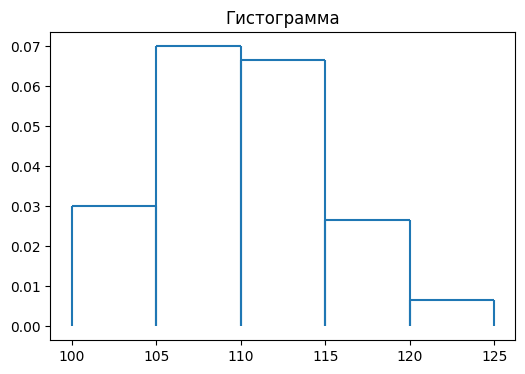

In [4]:
plot_hist(intervals, hitcounts)

In [5]:
from numpy import cumsum
def plot_emp_function(intervals, hicounts): #emperical distribution function plot
    total_hitcount = sum(hicounts)
    proportion_hicount = [hitcount/total_hitcount for hitcount in hicounts]
    emp_function = list(cumsum(proportion_hicount))

    fig = plt.figure(figsize=(6,4))
    plt.title('Эмперическая функция распределения')
    step = intervals[0][1] - intervals[0][0]
    extended_intervals = [(intervals[0][0]-step, intervals[0][1]-step)] + intervals + [(intervals[-1][0]+step, intervals[-1][1]+step)]
    emp_function.insert(0, 0)
    emp_function.append(1)

    for interval, distribution_value in zip(extended_intervals, emp_function):
        plt.vlines(x = interval[0], ymin = 0, ymax = distribution_value, linestyles='dotted')
        plt.vlines(x = interval[1], ymin = 0, ymax = distribution_value, linestyles='dotted')
        plt.hlines(y=distribution_value, xmin = interval[0], xmax= interval[1])

    plt.plot()

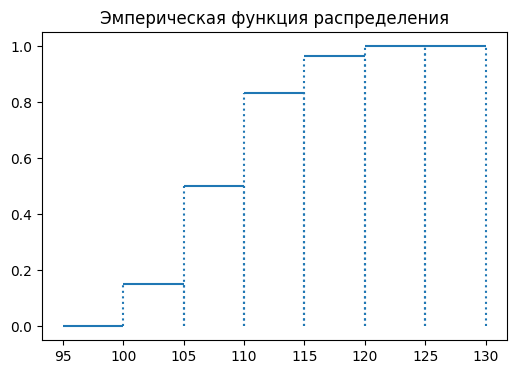

In [6]:
plot_emp_function(intervals,hitcounts)

### 2. Вычислительный анализ:
 1. выборочное среднее:

$$
\overline{X}_n=\sum_{i=1}^{k}\hat{x_i}
$$
$$ \hat{x_i} = \frac{z_{i-1}+z_i}{2}$$


In [7]:
def average(intervals, hitcounts):
    N = sum(hitcounts)
    result = 0.0
    for i in range(len(hitcounts)):
        dz = (intervals[i][0]+intervals[i][1])/2
        result += dz * hitcounts[i] / N
    return result

In [8]:
average(intervals, hitcounts)

110.25

$$\overline{X}_n=110.25$$

2. выборочная дисперсия (исправленная выборочная дисперсия без смещения):
    
$$
S_n^2=\sum_{j=1}^{n}(\hat{x_i}-\overline{X}_n)^2\dfrac{n_i}{n}
$$
$$
s_n^2=\dfrac{n}{n-1}S_n^2
$$

In [9]:
def dispersion(intervals, hitcounts):
    N = sum(hitcounts)
    result = 0.0
    avg = average(intervals, hitcounts)
    for i in range(len(hitcounts)):
        dz = (intervals[i][0]+intervals[i][1])/2
        result += (dz-avg)*(dz-avg) * hitcounts[i] / N
    return result

In [10]:
dispersion(intervals, hitcounts)

25.354166666666664

In [11]:
def dispersion_fixed(intervals, hitcounts):
    k = len(hitcounts)
    return k / (k-1) * dispersion(intervals, hitcounts)

In [12]:
dispersion_fixed(intervals, hitcounts)

31.69270833333333

$$
S_n^2= 25.35
$$
$$
s_n^2= 31.69
$$

3. медиана сгруппированных данных:

$$ M = L + W\frac{\frac{N}{2} – C}{F} $$
- L : Нижний предел среднего класса
- W : Ширина среднего класса
- N : Общая частота
- C : Суммарная частота до медианного класса
- F : Частота среднего класса

In [13]:
def median(intervals, hitcounts):
    N = sum(hitcounts)
    cumulative_sum = 0
    median_interval = None

    for i in range(len(hitcounts)):
        cumulative_sum += hitcounts[i]
        if cumulative_sum >= N / 2:
            median_interval = i
            break

    L = intervals[i][0]
    W = intervals[i][1]-intervals[i][0]
    C = cumulative_sum - hitcounts[i]
    F = hitcounts[i]

    return L + W * ((N/2 - C)/F)    
    

In [14]:
median(intervals, hitcounts)

110.0

$$
M = 110
$$

4. Коэффициент вариации:
$$ c_V = \frac{\sqrt{S_n^2}}{\overline{X}_n} $$

In [15]:
from math import sqrt
def variation(intervals, hitcounts):
    S2n = dispersion(intervals, hitcounts)
    avg = average(intervals, hitcounts)
    return sqrt(S2n)/avg

In [16]:
variation(intervals, hitcounts)

0.04567158379446952

$$
c_V=0.046
$$

k-тый центральный момент:
$$ \hat{x^*} = \frac{z_{i-1}+z_i}{2}$$
$$ \hat{M_k} = \sum_{i=1}^{k} (\hat{x^*} - \overline{X_n})^k \frac{n_i}{n}$$

In [17]:
def k_moment(intervals, hitcounts, k = 2):
    N = sum(hitcounts)
    result = 0.0
    avg = average(intervals, hitcounts)
    for i in range(len(hitcounts)):
        dz = (intervals[i][0]+intervals[i][1])/2
        result += ((dz-avg)**(k)) * hitcounts[i] / N
    return result 

5. Коэффициент ассиметрии:
$$ \zeta = \frac{\hat{M_3}}{(S_n^2)^\frac{3}{2}} $$

In [18]:
def skewness(intervals, hitcounts):
    M3 = k_moment(intervals, hitcounts, 3)
    S2n = dispersion(intervals, hitcounts)
    return M3/(S2n)**(1.5)

In [19]:
skewness(intervals, hitcounts)

0.30377203592166263

$$
\zeta = 0.304
$$

6. Эксцесс:
$$ ae_4 = \hat{M_4}-3(S_n^2)^2$$

In [20]:
def kurt(intervals, hitcounts):
    M4 = k_moment(intervals, hitcounts, 4)
    S2n = dispersion(intervals, hitcounts)
    return M4 - 3 * (S2n*S2n)

In [21]:
kurt(intervals, hitcounts)

-239.81510416666652

### 3. Анализ с добавлением флуктуаций:


Добавим к нашим данным ещё один интервал (995, 1000), в котором будет находиться только 1 значение.

Данные примут следующий вид:

| **Интервал**   | (140;145)  | (145;150)  | (150;155)  | (155;160)  | (160;165)  | (995,1000)|
|:--------------:|:----------:|:----------:|:----------:|:----------:|:----------:|:---------:|
|  **Частота**   |     45     |     105    |    100     |     40     |     10     |     1     |

In [22]:
hitcounts_fluc = [45, 105, 100, 40, 10, 1]
intervals_fluc = [(100,105), (105,110), (110,115), (115,120), (120,125), (995, 1000)]

In [23]:
avg = average(intervals, hitcounts)
avg_fluc = average(intervals_fluc, hitcounts_fluc)
print(avg, avg_fluc)

110.25 113.19767441860465


In [24]:
S2n = dispersion(intervals, hitcounts)
S2n_fluc = dispersion(intervals_fluc, hitcounts_fluc)
print(S2n, S2n_fluc)

25.354166666666664 2631.905276983698


In [25]:
med = median(intervals, hitcounts)
med_fluc = median(intervals_fluc, hitcounts_fluc)
print(med, med_fluc)

110.0 110.025


In [26]:
cofvar = variation(intervals, hitcounts)
cofvar_fluc = variation(intervals_fluc, hitcounts_fluc)
print(cofvar, cofvar_fluc)

0.04567158379446952 0.4532080578227488


In [27]:
skwns = skewness(intervals, hitcounts)
skwns_fluc = skewness(intervals_fluc, hitcounts_fluc)
print(skwns, skwns_fluc)

0.30377203592166263 17.013382269195958


In [28]:
krt = kurt(intervals, hitcounts)
krt_fluc = kurt(intervals_fluc, hitcounts_fluc)
print(krt, krt_fluc)

-239.81510416666652 2010814213.328954


In [29]:
k_moment(intervals_fluc, hitcounts_fluc, 4)

2031594989.4899979

|      **Показатель**      | **На исходных данных** | **На данных с флуктуацией** |
|:------------------------:|:----------------------:|:---------------------------:|
|         _Среднее_        |         110.25         |           113.198           |
| _Дисперсия_              |         25.354         |           2631.905           |
| _Медиана_                |         110.00         |           110.025           |
| _Коэффициент вариации_   |         0.046        |            0.453           |
| _Коэффициент ассиметрии_ |         0.304         |            17.013           |
| _Коэффициент эксцесса_   |         -239.815         |            2010814213.329           |